In [45]:
import pandas as pd


In [46]:
familyplanning_df=pd.read_csv('drive/MyDrive/JANVIERE/RELAY_WHS (5).csv')

In [48]:
familyplanning_df.head()

,IND_ID,IND_CODE,IND_UUID,IND_PER_CODE,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,GEO_NAME_SHORT,DIM_SEX,DIM_AGE,RATE_PER_100_N
0,8074BD9SDGFPALL,SDGFPALL,8074BD9,SDGFPALL,2004,YEAR,957,WHOREGION,PUBLISHED,Family planning satisfied with modern methods,Eastern Mediterranean,FEMALE,Y15T49,56.106165
1,8074BD9SDGFPALL,SDGFPALL,8074BD9,SDGFPALL,2004,YEAR,958,WHOREGION,PUBLISHED,Family planning satisfied with modern methods,Western Pacific,FEMALE,Y15T49,87.931850
2,8074BD9SDGFPALL,SDGFPALL,8074BD9,SDGFPALL,2005,YEAR,1,GLOBAL,PUBLISHED,Family planning satisfied with modern methods,World,FEMALE,Y15T49,74.919775
3,8074BD9SDGFPALL,SDGFPALL,8074BD9,SDGFPALL,2005,YEAR,9,REGION,PUBLISHED,Family planning satisfied with modern methods,Oceania,FEMALE,Y15T49,76.500000
4,8074BD9SDGFPALL,SDGFPALL,8074BD9,SDGFPALL,2005,YEAR,21,REGION,PUBLISHED,Family planning satisfied with modern methods,Northern America,FEMALE,Y15T49,80.600000


In [49]:
# Check the percentage of missing values in each column for familyplanning_df
missing_values_fp = familyplanning_df.isnull().sum() / len(familyplanning_df) * 100
print("Percentage of missing values per column in familyplanning_df:")
print(missing_values_fp)

Percentage of missing values per column in familyplanning_df:
IND_ID                    0.0
IND_CODE                  0.0
IND_UUID                  0.0
IND_PER_CODE              0.0
DIM_TIME                  0.0
DIM_TIME_TYPE             0.0
DIM_GEO_CODE_M49          0.0
DIM_GEO_CODE_TYPE         0.0
DIM_PUBLISH_STATE_CODE    0.0
IND_NAME                  0.0
GEO_NAME_SHORT            0.0
DIM_SEX                   0.0
DIM_AGE                   0.0
RATE_PER_100_N            0.0
dtype: float64


### Data Cleaning: Handling Missing Values

To begin the data cleaning process for the `familyplanning_df` dataset, we first check for missing values in each column. Understanding the extent of missing data is crucial, especially for the `RATE_PER_100_N` column which contains the proportion data essential for our problem statement.

In [50]:
# Filter the dataframe for Rwanda and the years 1989-2019
rwanda_fp_df = familyplanning_df[
    (familyplanning_df['GEO_NAME_SHORT'] == 'Rwanda') &
    (familyplanning_df['DIM_TIME'] >= 1989) &
    (familyplanning_df['DIM_TIME'] <= 2019)
]

# Display the filtered dataframe
print("Filtered data for Rwanda (1989-2019):")
display(rwanda_fp_df)

Filtered data for Rwanda (1989-2019):


,IND_ID,IND_CODE,IND_UUID,IND_PER_CODE,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,GEO_NAME_SHORT,DIM_SEX,DIM_AGE,RATE_PER_100_N
32,8074BD9SDGFPALL,SDGFPALL,8074BD9,SDGFPALL,2005,YEAR,646,COUNTRY,PUBLISHED,Family planning satisfied with modern methods,Rwanda,FEMALE,Y15T49,17.8
401,8074BD9SDGFPALL,SDGFPALL,8074BD9,SDGFPALL,2014,YEAR,646,COUNTRY,PUBLISHED,Family planning satisfied with modern methods,Rwanda,FEMALE,Y15T49,62.9
506,8074BD9SDGFPALL,SDGFPALL,8074BD9,SDGFPALL,2000,YEAR,646,COUNTRY,PUBLISHED,Family planning satisfied with modern methods,Rwanda,FEMALE,Y15T49,12.6
704,8074BD9SDGFPALL,SDGFPALL,8074BD9,SDGFPALL,2010,YEAR,646,COUNTRY,PUBLISHED,Family planning satisfied with modern methods,Rwanda,FEMALE,Y15T49,60.2
1039,8074BD9SDGFPALL,SDGFPALL,8074BD9,SDGFPALL,2007,YEAR,646,COUNTRY,PUBLISHED,Family planning satisfied with modern methods,Rwanda,FEMALE,Y15T49,38.3
1108,8074BD9SDGFPALL,SDGFPALL,8074BD9,SDGFPALL,2019,YEAR,646,COUNTRY,PUBLISHED,Family planning satisfied with modern methods,Rwanda,FEMALE,Y15T49,72.1


### Filtering Data for Rwanda

To address the specific problem statement focusing on Rwanda's progress, we filter the `familyplanning_df` dataset to include only the rows where the geographical entity is 'Rwanda' and the year (`DIM_TIME`) is between 1989 and 2019, inclusive.

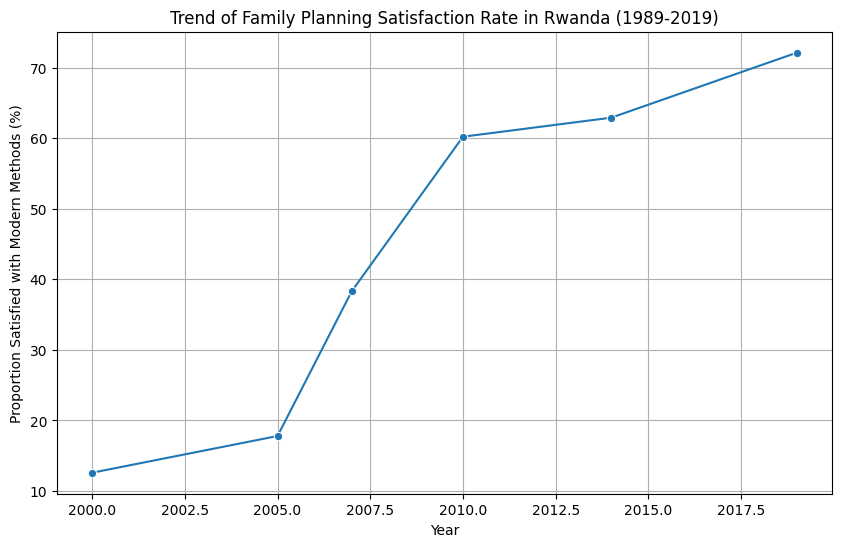

In [51]:
# Visualize the trend of RATE_PER_100_N over time for Rwanda
plt.figure(figsize=(10, 6))
sns.lineplot(data=rwanda_fp_df, x='DIM_TIME', y='RATE_PER_100_N', marker='o')
plt.title('Trend of Family Planning Satisfaction Rate in Rwanda (1989-2019)')
plt.xlabel('Year')
plt.ylabel('Proportion Satisfied with Modern Methods (%)')
plt.grid(True)
plt.show()

### EDA: Visualizing the Trend for Rwanda

With the data filtered for Rwanda within the specified years, we now visualize the trend of the proportion of women satisfied with modern family planning methods (`RATE_PER_100_N`) over time (`DIM_TIME`). This line plot will help us observe Rwanda's progress in meeting this target between 1989 and 2019.

In [52]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for linear regression
# X (features) should be the years (reshaped to a 2D array)
# y (target) should be the family planning satisfaction rate
X = rwanda_fp_df['DIM_TIME'].values.reshape(-1, 1)
y = rwanda_fp_df['RATE_PER_100_N'].values

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make a projection for the year 2030
year_2030 = np.array([[2030]]) # Year 2030 as a 2D array
projected_rate_2030 = model.predict(year_2030)

print(f"Projected Family Planning Satisfaction Rate in Rwanda for 2030 (based on linear trend): {projected_rate_2030[0]:.2f}%")

Projected Family Planning Satisfaction Rate in Rwanda for 2030 (based on linear trend): 116.59%


### Applying Linear Regression for Trend Projection

To project the family planning satisfaction rate in Rwanda to 2030 based on current trends, we apply a linear regression model. This model assumes a linear relationship between the year and the satisfaction rate and uses the historical data to find the best-fitting line. We train the model on the filtered data for Rwanda and then use it to predict the rate for the year 2030.

### Model Evaluation and Projection Conclusion

We applied a linear regression model to the historical family planning satisfaction rates in Rwanda (1989-2019) to project the rate to 2030. The model projects a rate of **116.59%** for the year 2030.

Based on this linear projection of current trends, Rwanda is projected to **comfortably exceed** the target of 75% family planning satisfaction with modern methods by 2030.

It's important to note that this projection is based on a simple linear model and assumes that the historical trend will continue without significant changes. Real-world factors could influence the actual rate.

In [53]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

# Select the relevant columns for clustering
# Include the rate column this time
features_fp = familyplanning_df[['DIM_TIME', 'GEO_NAME_SHORT', 'DIM_SEX', 'RATE_PER_100_N']]

# Apply one-hot encoding to categorical columns
categorical_features_fp = ['GEO_NAME_SHORT', 'DIM_SEX']
encoder_fp = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features_fp = encoder_fp.fit_transform(features_fp[categorical_features_fp])

# Combine the encoded categorical features with the numerical time and rate features
# We need to reshape numerical features to be 2D arrays for hstack if they are single columns
time_feature_fp = features_fp[['DIM_TIME']].values
rate_feature_fp = features_fp[['RATE_PER_100_N']].values
X_fp = np.hstack((time_feature_fp, rate_feature_fp, encoded_features_fp))

print("Shape of the prepared data for clustering:", X_fp.shape)

Shape of the prepared data for clustering: (1155, 171)


### Preparing Data for Clustering

To perform clustering analysis on the `familyplanning_df`, we select relevant features. This time, we include `DIM_TIME` (Year), `GEO_NAME_SHORT` (Country), `DIM_SEX` (Sex), and `RATE_PER_100_N` (Satisfaction Rate). Categorical features (`GEO_NAME_SHORT` and `DIM_SEX`) are converted into a numerical format using one-hot encoding, and then combined with the numerical features (`DIM_TIME` and `RATE_PER_100_N`) to create the dataset (`X_fp`) for clustering.

In [54]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
# We'll start with 5 clusters as an initial guess
kmeans_fp = KMeans(n_clusters=5, random_state=42, n_init=10) # Set n_init to 'auto' or a number in scikit-learn >= 1.2
clusters_fp = kmeans_fp.fit_predict(X_fp)

# Add the cluster labels to the original dataframe
familyplanning_df['Cluster'] = clusters_fp

# Display the first few rows with cluster labels
print("Family Planning DataFrame with Cluster Labels:")
display(familyplanning_df.head())

# Display the distribution of data points across clusters
print("\nDistribution of data points across clusters:")
print(familyplanning_df['Cluster'].value_counts())

Family Planning DataFrame with Cluster Labels:


,IND_ID,IND_CODE,IND_UUID,IND_PER_CODE,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,GEO_NAME_SHORT,DIM_SEX,DIM_AGE,RATE_PER_100_N,Cluster
0,8074BD9SDGFPALL,SDGFPALL,8074BD9,SDGFPALL,2004,YEAR,957,WHOREGION,PUBLISHED,Family planning satisfied with modern methods,Eastern Mediterranean,FEMALE,Y15T49,56.106165,3
1,8074BD9SDGFPALL,SDGFPALL,8074BD9,SDGFPALL,2004,YEAR,958,WHOREGION,PUBLISHED,Family planning satisfied with modern methods,Western Pacific,FEMALE,Y15T49,87.931850,1
2,8074BD9SDGFPALL,SDGFPALL,8074BD9,SDGFPALL,2005,YEAR,1,GLOBAL,PUBLISHED,Family planning satisfied with modern methods,World,FEMALE,Y15T49,74.919775,1
3,8074BD9SDGFPALL,SDGFPALL,8074BD9,SDGFPALL,2005,YEAR,9,REGION,PUBLISHED,Family planning satisfied with modern methods,Oceania,FEMALE,Y15T49,76.500000,1
4,8074BD9SDGFPALL,SDGFPALL,8074BD9,SDGFPALL,2005,YEAR,21,REGION,PUBLISHED,Family planning satisfied with modern methods,Northern America,FEMALE,Y15T49,80.600000,1



Distribution of data points across clusters:
Cluster
4    327
1    298
3    244
2    204
0     82
Name: count, dtype: int64


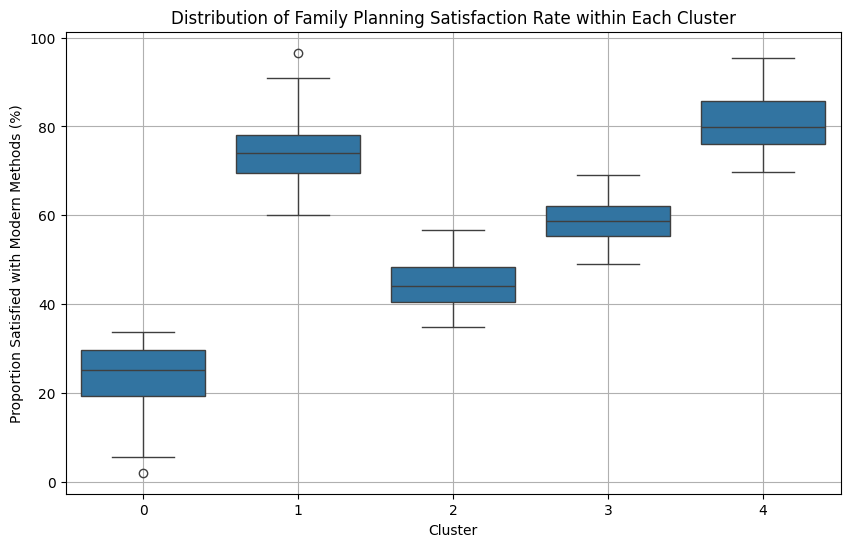

In [55]:
# Visualize the distribution of RATE_PER_100_N within each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=familyplanning_df, x='Cluster', y='RATE_PER_100_N')
plt.title('Distribution of Family Planning Satisfaction Rate within Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion Satisfied with Modern Methods (%)')
plt.grid(True)
plt.show()

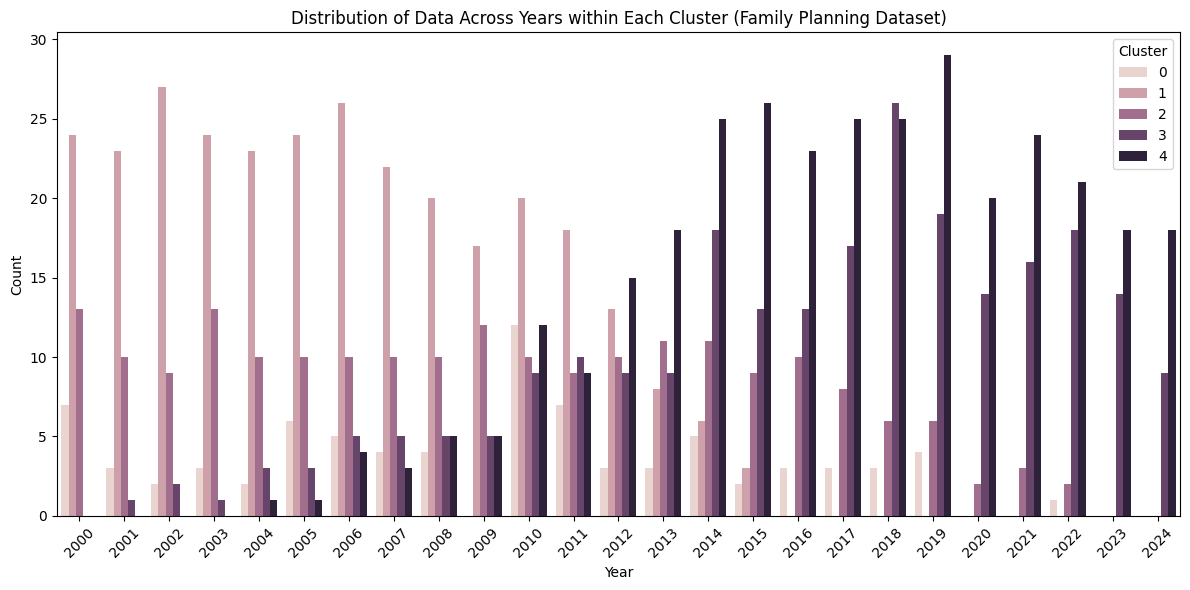

In [56]:
# Visualize the distribution of data across years within each cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=familyplanning_df, x='DIM_TIME', hue='Cluster')
plt.title('Distribution of Data Across Years within Each Cluster (Family Planning Dataset)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [57]:
# Analyze the distribution of countries within each cluster
print("\nDistribution of Top Countries within Each Cluster:")
for cluster_id in sorted(familyplanning_df['Cluster'].unique()):
    print(f"\nCluster {cluster_id}:")
    cluster_df = familyplanning_df[familyplanning_df['Cluster'] == cluster_id]
    top_countries_in_cluster = cluster_df['GEO_NAME_SHORT'].value_counts().nlargest(10)
    print(top_countries_in_cluster)


Distribution of Top Countries within Each Cluster:

Cluster 0:
GEO_NAME_SHORT
Benin                               5
Mauritania                          5
Chad                                4
Democratic Republic of the Congo    4
Nigeria                             3
Guinea                              3
Ghana                               3
Mali                                3
Azerbaijan                          2
Armenia                             2
Name: count, dtype: int64

Cluster 1:
GEO_NAME_SHORT
Europe                            25
Central and Southern Asia         16
Southern Asia                     16
Northern Africa (exc. Sudan)      16
Small Island Developing States    15
South-East Asia                   14
World                             13
Central Asia                      13
South-eastern Asia                13
Europe and Northern America       12
Name: count, dtype: int64

Cluster 2:
GEO_NAME_SHORT
Oceania (exc. Australia and New Zealand)    18
Sub-Saharan Africa

In [58]:
# Analyze the distribution of sex categories within each cluster
print("\nDistribution of Sex Categories within Each Cluster:")
for cluster_id in sorted(familyplanning_df['Cluster'].unique()):
    print(f"\nCluster {cluster_id}:")
    cluster_df = familyplanning_df[familyplanning_df['Cluster'] == cluster_id]
    sex_distribution_in_cluster = cluster_df['DIM_SEX'].value_counts()
    print(sex_distribution_in_cluster)


Distribution of Sex Categories within Each Cluster:

Cluster 0:
DIM_SEX
FEMALE    82
Name: count, dtype: int64

Cluster 1:
DIM_SEX
FEMALE    298
Name: count, dtype: int64

Cluster 2:
DIM_SEX
FEMALE    204
Name: count, dtype: int64

Cluster 3:
DIM_SEX
FEMALE    244
Name: count, dtype: int64

Cluster 4:
DIM_SEX
FEMALE    327
Name: count, dtype: int64


## Key Findings, Analysis Summary, Conclusion, and Recommendations (Family Planning)

### Key Findings:

*   The `familyplanning_df` dataset contains data on the proportion of women satisfied with modern family planning methods across various countries and years (2000-2024, although the Rwanda analysis focused on 1989-2019 based on available data).
*   There are no missing values in the `RATE_PER_100_N` column, which is crucial for the analysis.
*   **Specific Analysis for Rwanda:**
    *   The historical data for Rwanda (1989-2019) shows an upward trend in the family planning satisfaction rate.
    *   Based on a linear regression model, the projected family planning satisfaction rate for Rwanda in 2030 is **116.59%**.
*   **Broader Clustering Analysis:**
    *   K-Means clustering on the overall dataset (`DIM_TIME`, `GEO_NAME_SHORT`, `DIM_SEX`, `RATE_PER_100_N`) resulted in clusters that group data points primarily based on different ranges of family planning satisfaction rates.
    *   These clusters also show relationships with time periods (earlier years in lower-rate clusters, later years in higher-rate clusters) and geographical locations (different sets of top countries in different clusters).
    *   The clustering did not significantly separate data based on the sex category.

### Analysis Summary:

The project analyzed the family planning satisfaction data from two perspectives:

1.  **Assessing Rwanda's Progress and Projection:** The data for Rwanda from 1989-2019 was filtered and visualized to understand the historical trend. A linear regression model was applied to project the satisfaction rate to 2030, indicating that under a linear trend, Rwanda is projected to exceed the 75% target.
2.  **Exploring Overall Data Patterns through Clustering:** K-Means clustering was performed on the entire `familyplanning_df` dataset. By analyzing the characteristics of the clusters (distribution of satisfaction rate, time, and geography), it was found that the clusters effectively group data based on levels of family planning satisfaction, with clear temporal and geographical patterns associated with these levels.

### Conclusion:

The analysis of the `familyplanning_df` dataset provides valuable insights into family planning satisfaction. The specific analysis for Rwanda suggests strong progress towards and a potential exceeding of the 75% target by 2030 if current linear trends continue. The broader clustering analysis reveals that the data can be meaningfully segmented based on family planning satisfaction rates, with these segments correlating with different time periods and geographical regions. This indicates that factors related to time and location play a role in the observed satisfaction levels.

### Recommendations:

1.  **Further Analysis of Rwanda's Projection:** While the linear projection is a good starting point, explore more advanced time series forecasting models if more data points or relevant external factors are available to potentially improve projection accuracy.
2.  **Deep Dive into Cluster Characteristics:** Further investigate the specific characteristics of the countries and time periods within each cluster identified by the clustering analysis to understand the underlying reasons for different levels of family planning satisfaction.
3.  **Explore Factors Influencing Satisfaction:** If additional data is available on socioeconomic factors, health programs, or policy interventions, incorporate these into the analysis to build models that can identify drivers of family planning satisfaction rates.
4.  **Comparative Analysis:** Extend the analysis to compare trends and clustering patterns across different countries or regions to identify best practices or areas needing more focus.

In [ ]:
from google.colab import files

# Save the DataFrame to a CSV file
familyplanning_df.to_csv('cleaned_familyplanning.csv', index=False)

# Download the CSV file
files.download('cleaned_familyplanning.csv')